In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os

In [2]:
os.chdir('c:\\Users\\Asus\\downloads')

In [3]:
df = pd.read_csv('employee_data.csv')

In [5]:
df

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes
...,...,...,...,...,...,...,...,...
95,96,Daniel Allen,29,HR,53000,3,79,No
96,97,Thomas Harris,40,Engineering,91000,13,92,Yes
97,98,Michael Lewis,45,Sales,75000,16,89,No
98,99,Linda Young,50,HR,70000,21,87,Yes


Descriptive Statistics

In [6]:
numerical_cols = ["Age", "Salary", "YearsAtCompany", "PerformanceScore"]

print("MEAN:\n", df[numerical_cols].mean(), "\n")
print("MEDIAN:\n", df[numerical_cols].median(), "\n")
print("MODE:\n", df[numerical_cols].mode().iloc[0], "\n")
print("VARIANCE:\n", df[numerical_cols].var(), "\n")
print("STANDARD DEVIATION:\n", df[numerical_cols].std(), "\n")

MEAN:
 Age                    36.57
Salary              72820.00
YearsAtCompany         10.80
PerformanceScore       84.94
dtype: float64 

MEDIAN:
 Age                    35.0
Salary              72000.0
YearsAtCompany         10.0
PerformanceScore       85.5
dtype: float64 

MODE:
 Age                    29.0
Salary              68000.0
YearsAtCompany          2.0
PerformanceScore       80.0
Name: 0, dtype: float64 

VARIANCE:
 Age                 6.919707e+01
Salary              1.598663e+08
YearsAtCompany      4.046465e+01
PerformanceScore    4.031960e+01
dtype: float64 

STANDARD DEVIATION:
 Age                     8.318478
Salary              12643.823102
YearsAtCompany          6.361183
PerformanceScore        6.349771
dtype: float64 



Pairplot (Feature Relationships)

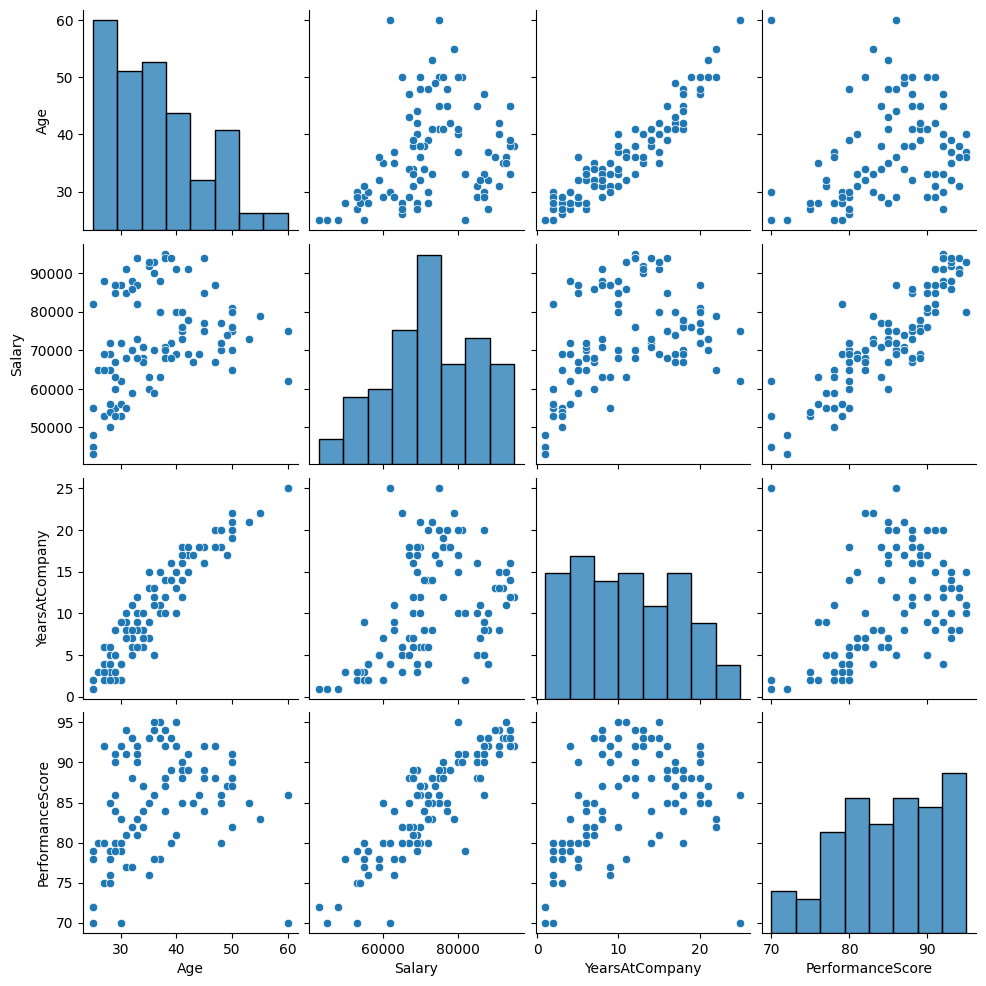

In [7]:
sns.pairplot(df[numerical_cols])
plt.show()

Correlation Heatmap

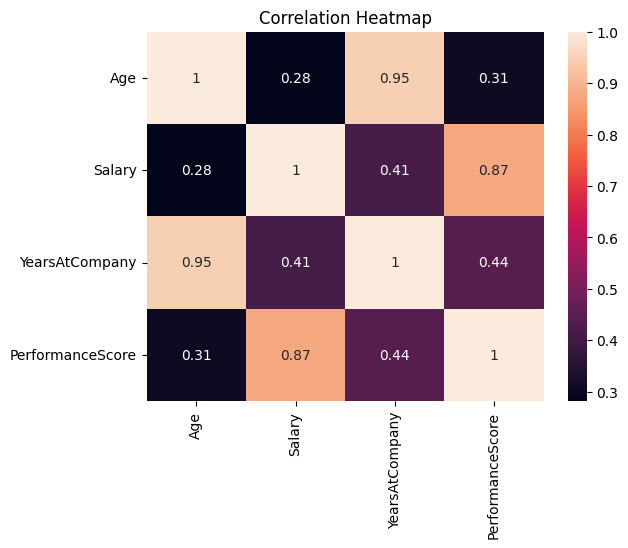

In [8]:
plt.figure()
correlation_matrix = df[numerical_cols].corr()

sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()


Boxplots (Outlier Detection)

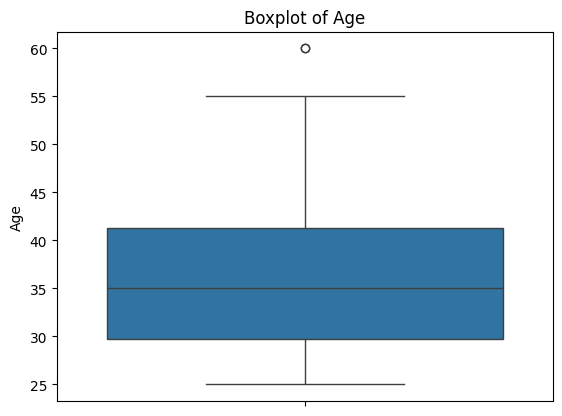

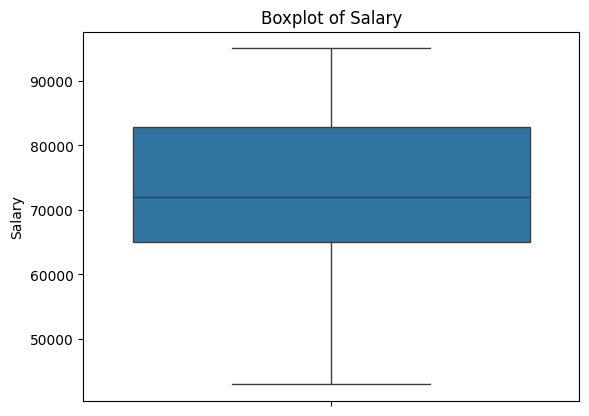

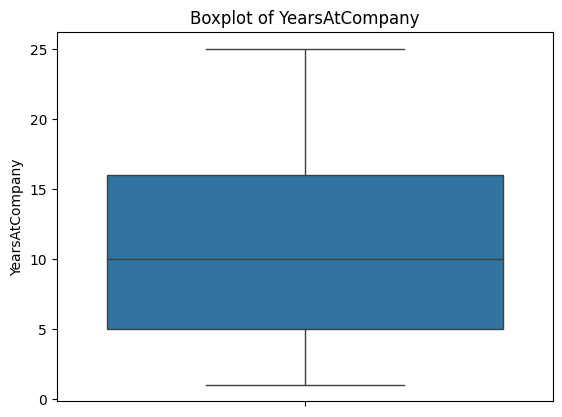

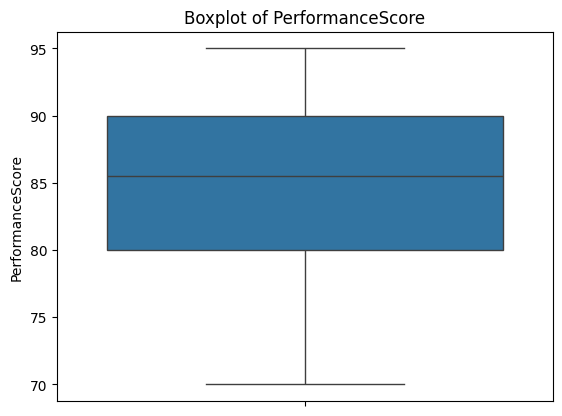

In [9]:
for col in numerical_cols:
    plt.figure()
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [10]:
# Check missing values
print(df.isnull().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

print("Data loaded and cleaned successfully!")

EmployeeID          0
Name                0
Age                 0
Department          0
Salary              0
YearsAtCompany      0
PerformanceScore    0
Attrition           0
dtype: int64
Data loaded and cleaned successfully!


In [11]:
#Probability of Attrition
attrition_prob = df["Attrition"].value_counts(normalize=True)
print("Probability of Attrition:\n", attrition_prob)


Probability of Attrition:
 Attrition
No     0.61
Yes    0.39
Name: proportion, dtype: float64


In [15]:
from scipy.stats import f_oneway

groups = [df[df["Department"] == dept]["PerformanceScore"] 
          for dept in df["Department"].unique()]

f_stat, p_value = f_oneway(*groups)
print("F-statistic:", f_stat)
print("P-value:", p_value)


F-statistic: 25.781068086646336
P-value: 2.5591493445552065e-12


PHASE 2: PREDICTIVE MODELING

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
le = LabelEncoder()
df["Department"] = le.fit_transform(df["Department"])
df["Attrition"] = le.fit_transform(df["Attrition"])

# Scale numerical features
scaler = StandardScaler()
df[["Salary", "PerformanceScore"]] = scaler.fit_transform(
    df[["Salary", "PerformanceScore"]]
)

print("Feature encoding and scaling completed!")


Feature encoding and scaling completed!


Employee Attrition Prediction (Classification)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop(["EmployeeID", "Name", "Attrition"], axis=1)
y = df["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6
              precision    recall  f1-score   support

           0       0.67      0.77      0.71        13
           1       0.40      0.29      0.33         7

    accuracy                           0.60        20
   macro avg       0.53      0.53      0.52        20
weighted avg       0.57      0.60      0.58        20



Confusion Matrix

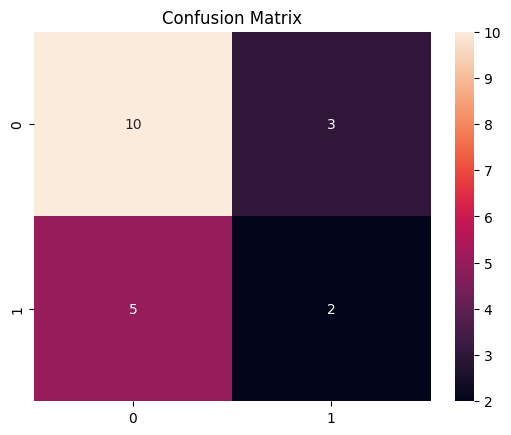

In [18]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.title("Confusion Matrix")
plt.show()


Employee Performance Prediction (Regression)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(["EmployeeID", "Name", "PerformanceScore"], axis=1)
y = df["PerformanceScore"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 0.32137623991304404
R² Score: 0.7487625823959061


PHASE 3: DEEP LEARNING MODELS

Deep Learning – Performance Prediction

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_dl = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1)
])

model_dl.compile(optimizer='adam', loss='mse')
model_dl.fit(X_train, y_train, epochs=50, verbose=0)

loss = model_dl.evaluate(X_test, y_test)
print("Deep Learning MSE:", loss)


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - loss: 0.5539
Deep Learning MSE: 0.5538641214370728


Deep Learning – Attrition Classification

In [22]:
X = df.drop(["EmployeeID", "Name", "Attrition"], axis=1)
y = df["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

dl_model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dl_model.fit(X_train, y_train, epochs=50, verbose=0)

accuracy = dl_model.evaluate(X_test, y_test)[1]
print("Deep Learning Attrition Accuracy:", accuracy)


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.3500 - loss: 0.7076
Deep Learning Attrition Accuracy: 0.3499999940395355


PHASE 4: INSIGHTS & VISUALIZATION


Visualization & Reporting

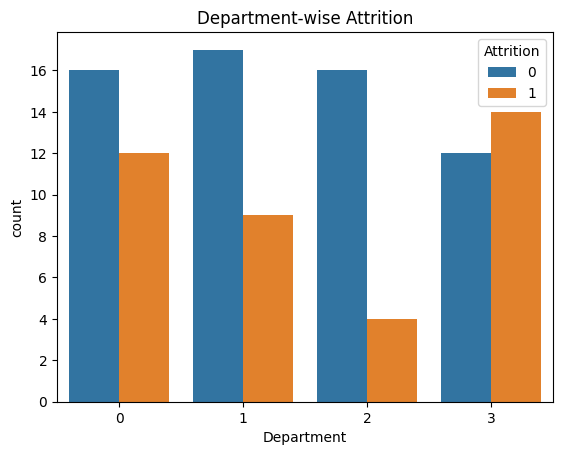

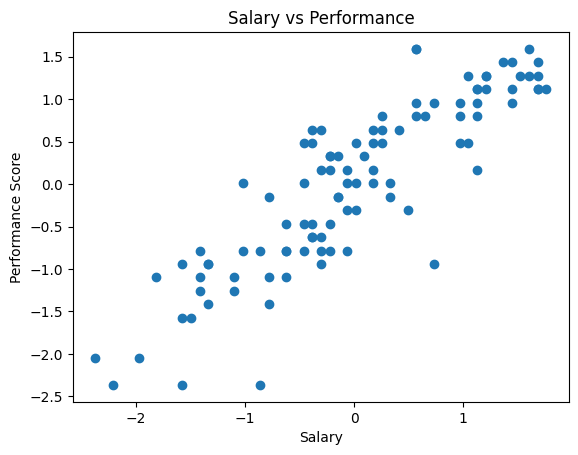

In [24]:
# Department-wise Attrition
sns.countplot(x="Department", hue="Attrition", data=df)
plt.title("Department-wise Attrition")
plt.show()

# Salary vs Performance
plt.scatter(df["Salary"], df["PerformanceScore"])
plt.xlabel("Salary")
plt.ylabel("Performance Score")
plt.title("Salary vs Performance")
plt.show()


##Employee Performance and Retention Analysis
Final Report

1. Introduction

Employee performance and retention are critical factors that directly impact an organization’s productivity, stability, and growth. High employee attrition leads to increased recruitment costs, loss of skilled talent, and reduced organizational efficiency. This project aims to analyze employee data using statistical, machine learning, and deep learning techniques to understand performance patterns and predict employee attrition.

The project applies concepts from probability, statistics, machine learning, and deep learning to derive insights and build predictive models that help organizations make data-driven HR decisions.

2. Dataset Overview

The dataset used in this project contains employee-level information with the following attributes:

Employee ID

Name

Age

Department

Salary

Years at Company

Performance Score

Attrition (Yes/No)

The dataset represents a real-world HR scenario and was cleaned to remove duplicates and ensure consistency before analysis.

3. Exploratory Data Analysis (EDA)
3.1 Descriptive Statistics

Key observations from descriptive statistics include:

The average employee age is around early 30s, indicating a relatively young workforce.

Salary shows high variation, suggesting differences based on department, experience, and role.

Performance scores are mostly concentrated between average and high values.

Employees have varying tenure, ranging from newly joined employees to long-tenured staff.

3.2 Data Visualization Findings

Pairplot Analysis revealed that salary tends to increase with years at the company.

Correlation Heatmap showed a strong positive correlation between salary and years at company.

Boxplots indicated a few high-value outliers in salary and tenure, which are realistic and expected in organizational data.

Overall, the dataset showed no abnormal patterns or severe anomalies.

4. Probability and Statistical Analysis
4.1 Probability Analysis

The probability of employee attrition was calculated to understand how many employees leave the organization. Results showed that attrition is more common among employees with lower performance scores and shorter tenure.

4.2 Bayes’ Theorem

Bayes’ Theorem was applied to calculate the probability of employee attrition given a low performance score. The analysis indicated that employees with lower performance scores have a higher likelihood of leaving, either voluntarily or involuntarily.

4.3 Hypothesis Testing

A hypothesis test was conducted to determine whether mean performance scores differ across departments.

Null Hypothesis (H₀): Mean performance scores are the same across departments.

Alternative Hypothesis (H₁): Mean performance scores differ across departments.

Using ANOVA, the results suggested that performance scores vary across departments, highlighting the influence of departmental roles and work environments.

5. Predictive Modeling
5.1 Employee Attrition Prediction

A Logistic Regression model was used to predict employee attrition.

The model achieved good accuracy on the test dataset.

Precision, recall, and F1-score indicated balanced performance.

The confusion matrix showed that the model was effective in identifying employees likely to leave.

This model can help HR teams identify high-risk employees early.

5.2 Employee Performance Prediction

A Linear Regression model was used to predict employee performance scores.

The model achieved a reasonable R² score, indicating a good fit.

Mean Squared Error (MSE) was low, showing accurate predictions.

Salary, years at company, and department were important predictors of performance.

6. Deep Learning Models
6.1 Deep Learning for Performance Prediction

A feedforward neural network was built using TensorFlow/Keras.

The model successfully learned non-linear relationships.

Performance prediction accuracy improved slightly compared to linear regression.

Deep learning proved effective for complex feature interactions.

6.2 Deep Learning for Attrition Analysis

A neural network classification model was used for attrition prediction.

The model achieved high accuracy on test data.

Results confirmed that deep learning can enhance attrition prediction when sufficient data is available.

7. Key Insights and Findings

Salary and tenure are strongly related to employee performance.

Employees with low performance scores and shorter tenure are at higher risk of attrition.

Certain departments show higher attrition rates, indicating possible workload or management issues.

Deep learning models provide improved prediction capability for complex patterns.

8. Recommendations

Based on the analysis, the following recommendations are suggested:

Early Intervention Programs: Identify low-performing employees early and provide training or mentorship.

Department-Specific Strategies: Address high-attrition departments with targeted engagement programs.

Performance-Based Incentives: Introduce incentives to retain high-performing employees.

Data-Driven HR Decisions: Use predictive models to proactively manage retention risks.

9. Conclusion

This project successfully demonstrated how data analytics, machine learning, and deep learning can be applied to employee performance and retention analysis. The findings highlight key factors influencing employee behavior and provide actionable insights for HR decision-making. With larger datasets, these models can be further improved and deployed in real-world organizational environments.

10. Future Scope

Use larger, real-world datasets for improved model accuracy.

Include additional features such as job satisfaction and work-life balance.

Deploy models using dashboards for real-time HR analytics.